#### Use Machine Learning to detect conditions with measurements of anonymous characteristics

##### 1 Identify the problem :

##### 2.Selecting a performance measure :

##### 3.Data preparation and first statistics


###### 3.1Dataset Description

###### 3.2Loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#training_data
train_df = pd.read_csv('/kaggle/input/dataset/train.csv')
#test_data
test_df = pd.read_csv('/kaggle/input/dataset/test.csv')
#other
greeks_df = pd.read_csv('/kaggle/input/dataset/greeks.csv')

###### 3.3Examine the data structure.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#Show first five lines
train_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
#Dataset information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [6]:
train_df['Class'] = train_df['Class'].apply(str)

In [7]:
train_df['Class']

0      1
1      0
2      0
3      0
4      1
      ..
612    0
613    0
614    0
615    0
616    0
Name: Class, Length: 617, dtype: object

###### 4.Summary statistics and data visualization

###### 4.1Descriptive statistics

In [8]:
#Numerical variables
train_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,615.000000,614.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,21.419492,231.322223,98.328737,1218.133238,550.632525,77.104151,0.688801,90.251735,11.241064,0.030615,1.403761,0.742262,36.917590,1.383792,27.165653,51.128326,401.901299,0.633884,0.367002,146.972099,94.795377,26.370568,1.802900,1.924830,26.388989,9.072700,3.064778,1731.248215,0.305107,69.582596,105.060712,69.117005,71.341526,6.930086,10306.810737,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,3.478278,183.992505,96.479371,7575.293707,2076.371275,159.049302,0.263994,51.585130,13.571133,0.014808,1.922210,0.281195,17.266347,0.538717,14.645993,21.210888,317.745623,1.912384,0.112989,86.084419,28.243187,8.038825,9.034721,1.484555,18.116679,6.200281,2.058344,1790.227476,1.847499,38.555707,68.445620,390.187057,165.551545,64.754262,11331.294051,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,9.886800,72.948951,1.331155,51.216883,257.432377,12.499760,0.176874,23.387600,0.510888,0.003184,1.050225,0.069225,13.784111,0.137925,7.030640,6.906400,35.998895,0.238680,0.040995,60.232470,10.345600,6.339496,0.005518,1.743070,0.804068,4.926396,0.286201,185.594100,0.003042,5.394675,78.526968,3.828384,7.534128,0.296850,1563.136688,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,19.420500,156.847239,27.834425,424.990642,257.432377,23.317567,0.563688,64.724192,5.066306,0.023482,1.050225,0.589575,29.782467,1.070298,7.030640,37.942520,188.815690,0.238680,0.295164,102.703553,78.232240,20.888264,0.005518,1.743070,14.715792,5.965392,1.648679,1111.160625,0.003042,30.927468,78.526968,4.324656,25.815384,0.296850,5164.666260,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,21.186000,193.908816,61.642115,627.417402,257.432377,42.554330,0.658715,79.819104,9.123000,0.027860,1.050225,0.730800,34.835130,1.351665,36.019104,49.180940,307.509595,0.238680,0.358023,130.050630,96.264960,25.248800,0.251741,1.743070,21.642456,8.149404,2.616119,1493.817413,0.085176,71.949306,78.526968,22.641144,36.394008,1.870155,7345.143424,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,23.657700,247.803462,134.009015,975.649259,257.432377,77.310097,0.772206,99.813520,13.565901,0.034427,1.228445,0.859350,40.529401,1.660617,37.935832,61.408760,507.896200,0.238680,0.426348,165.836955,110.640680,30.544224,1.058690,1.743070,34.058344,10.503048,3.910070,1905.701475,0.237276,109.125159,112.766654,49.085352,56.714448,4.880214,10647.951650,11.516657,6.238814,1.512060,0.535067,25.608406,

In [9]:
train_df.skew()

/tmp/ipykernel_20/2566899487.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.skew()


AB        5.927245
AF        3.751057
AH       10.094184
AM        6.434969
AR       13.259275
AX        4.400920
AY       24.270320
AZ        0.799989
BC       19.726787
BD       10.455121
BN       -0.452831
BP        6.464570
BQ        1.380746
BR       21.804495
BZ       22.193979
CB        8.775588
CC        5.568676
CD        4.087235
CF        9.302033
CH        6.274781
CL       11.398838
CR        2.448436
CS        7.944825
CU        0.961026
CW       -0.406131
DA        1.644509
DE        2.039423
DF       13.798896
DH        0.772547
DI        4.401212
DL        1.246755
DN        0.915665
DU       14.590580
DV       13.167744
DY        1.970481
EB        8.677239
EE        2.059802
EG        9.608652
EH       20.084787
EL       -0.147017
EP        9.282442
EU       14.985507
FC       11.366151
FD       23.402877
FE        5.300799
FI        1.388188
FL        6.601233
FR       24.618316
FS       21.801439
GB        3.145217
GE        4.913469
GF        3.042299
GH        0.

In [10]:
#Target variable.
train_df.Class.value_counts()

0    509
1    108
Name: Class, dtype: int64

Text(0, 0.5, 'Number of observations per class.')

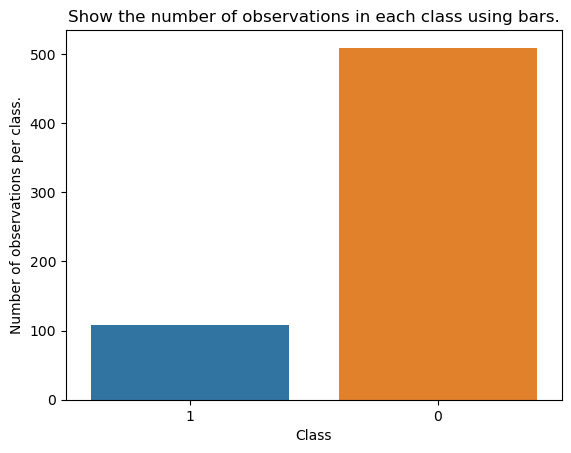

In [11]:
sns.countplot(data=train_df, x="Class")
plt.title('Show the number of observations in each class using bars.')
plt.xlabel('Class')
plt.ylabel('Number of observations per class.')

In [12]:
#column EJ
train_df['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

Text(0, 0.5, 'Number of observations per CATEGORY.')

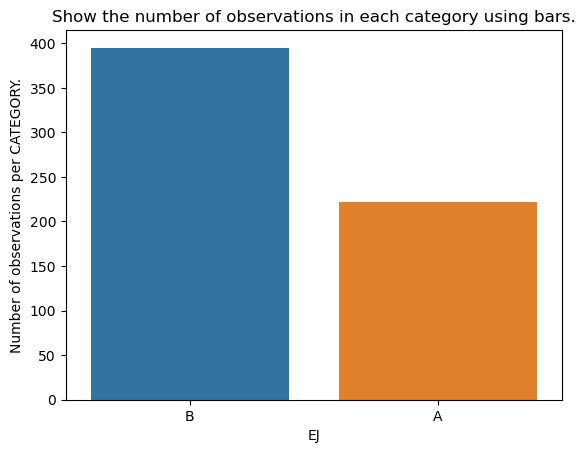

In [13]:
sns.countplot(data=train_df, x="EJ")
plt.title('Show the number of observations in each category using bars.')
plt.xlabel('EJ')
plt.ylabel('Number of observations per CATEGORY.')

###### 5.PREPARE DATA FOR MACHINE LEARNING MACHINE LEARNING ALGORITHMS

In [14]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# train_df['EJ'] = encoder.fit_transform(train_df['EJ'].values.reshape(-1,1)).toarray()

In [15]:
# test_df['EJ'] = encoder.transform(test_df['EJ'].values.reshape(-1,1)).toarray()

In [16]:
#Features
X = train_df.drop(['Id','Class'],axis=1)
#Target
y = train_df['Class']

#Test
X_test = test_df.drop(['Id'],axis=1)

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neural_network import MLPClassifier

In [18]:
# Scale numeric values
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# One-hot encode categorical values
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, selector(dtype_include='float64')),
        ('cat', cat_transformer, selector(dtype_include='category'))])

In [20]:
X = preprocessor.fit_transform(X)

In [21]:
X_test = preprocessor.transform(X_test)

In [22]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [23]:
# on transforme y_comb en Series pour avoir un affichage plus agréable
pd.Series(y_resampled).value_counts()

1    509
0    509
Name: Class, dtype: int64

In [24]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(x_train, y_train)
# X_val, y_val = smote.fit_resample(x_val, y_val)

# train_X_sm = pd.DataFrame(X_train, columns=X.columns)
# valid_X_sm = pd.DataFrame(X_val, columns=X.columns)

# print(train_Y_sm.value_counts())
# print(valid_Y_sm.value_counts())

In [25]:
from sklearn.model_selection import train_test_split
#x_train, x_val, y_train, y_val = train_test_split(X_resampled,y_resampled,test_size=0.1,random_state = 42)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_resampled)

###### 6.Choice of machine learning models.

In [27]:
#Random Forest Classifier.
random_forest_clf = Pipeline(
    steps=[
        #("preprocessor", preprocessor),
        ("select_from_model",SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=None,
        min_samples_split=2, random_state=0),threshold='median')),
         ("classifier", RandomForestClassifier(n_estimators=100, max_depth=None,
         min_samples_split=2, random_state=0))
         ]
        )


In [28]:
random_forest_clf.fit(X_resampled,y_resampled)

Pipeline(steps=[('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                                 threshold='median')),
                ('classifier', RandomForestClassifier(random_state=0))])

In [29]:
#GradientBoostingClassifier 
gradient_boosting_clf = Pipeline(
    steps=[
        #("preprocessor", preprocessor),
        ("select_from_model",SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=None,
        min_samples_split=2, random_state=0),threshold='median')),
         ("classifier", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=1, random_state=0))
         ]
        )

In [30]:
gradient_boosting_clf.fit(X_resampled,y_resampled)

Pipeline(steps=[('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                                 threshold='median')),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=1,
                                            random_state=0))])

In [31]:
# y_val_xgb = le.transform(y_val)

In [32]:
#XGBClassifier
xgb_clf = Pipeline(
    steps=[
        #("preprocessor", preprocessor),
        ("select_from_model",SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=None,
        min_samples_split=2, random_state=0),threshold='median')),
         ("classifier", XGBClassifier(objective="binary:logistic", random_state=42))
         ]
        )

In [33]:
xgb_clf.fit(X_resampled,y_train_xgb)

Pipeline(steps=[('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                                 threshold='median')),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None,...one,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [34]:
#LogisticRegression
logistic_clf = Pipeline(
    steps=[
        #("preprocessor", preprocessor),
        ("select_from_model",SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=None,
        min_samples_split=2, random_state=0),threshold='median')),
         ("classifier", LogisticRegression(random_state=42))
         ]
        )

In [35]:
logistic_clf.fit(X_resampled,y_resampled)

Pipeline(steps=[('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                                 threshold='median')),
                ('classifier', LogisticRegression(random_state=42))])

In [36]:
#DecisionTreeClassifier
dtree_clf = Pipeline(
    steps=[
        #("preprocessor", preprocessor),
        ("select_from_model",SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=None,
       min_samples_split=2, random_state=0),threshold='median')),
         ("classifier", DecisionTreeClassifier(random_state=42))
         ]
        )

In [37]:
dtree_clf.fit(X_resampled,y_resampled)

Pipeline(steps=[('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                                 threshold='median')),
                ('classifier', DecisionTreeClassifier(random_state=42))])

###### 7.Improving assessment through cross-validation

In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [39]:
#cv =StratifiedKFold(n_splits=10,shuffle=True, random_state=42)
#kf = KFold(n_splits=10, shuffle=True, random_state = 42)

In [40]:
##Random Forest Classifier.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest_clf, X_resampled,y_resampled, cv=10,scoring='neg_log_loss')
scores

array([-0.18746775, -0.19880022, -0.12674316, -0.17552446, -0.12524779,
       -0.1488549 , -0.16358158, -0.1877144 , -0.1371541 , -0.1487812 ])

In [41]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.16 accuracy with a standard deviation of 0.03


In [42]:
#GradientBoostingClassifier
scores = cross_val_score(gradient_boosting_clf, X_resampled,y_resampled, cv=10,scoring='neg_log_loss')
scores

array([-0.17574528, -0.25332172, -0.05521353, -0.29847957, -0.11047531,
       -0.14512824, -0.13782991, -0.26016363, -0.11662498, -0.14949942])

In [43]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.17 accuracy with a standard deviation of 0.07


In [44]:
#XGBClassifier
scores = cross_val_score(xgb_clf, X_resampled, y_train_xgb, cv=10,scoring='neg_log_loss')
scores

array([-0.05283103, -0.10084991, -0.03680063, -0.12683571, -0.08725534,
       -0.08665136, -0.05997967, -0.15317762, -0.09612479, -0.02609614])

In [45]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.08 accuracy with a standard deviation of 0.04


In [46]:
#LogisticRegression
scores = cross_val_score(logistic_clf,X_resampled,y_resampled, cv=10,scoring='neg_log_loss')
scores

array([-0.26802416, -0.3358706 , -0.25915463, -0.32230955, -0.20423967,
       -0.51746434, -0.34368706, -0.39068806, -0.33062802, -0.29397388])

In [47]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.33 accuracy with a standard deviation of 0.08


In [48]:
##DecisionTreeClassifier
scores = cross_val_score(dtree_clf,X_resampled,y_resampled, cv=10,scoring='neg_log_loss')
scores

array([-3.88706066, -4.59379896, -2.12021491, -5.30053726, -2.82695321,
       -4.24042981, -2.47358406, -4.24042981, -2.14120713, -1.42747142])

In [49]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-3.33 accuracy with a standard deviation of 1.22


###### 8.Fine-tune my models using grid search.

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
param_grid = { 
    'classifier__max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'classifier__learning_rate': [0.001, 0.01, 0.1, 0.20, 0.25, 0.30],
    "classifier__gamma":[0, 0.25, 0.5, 0.75,1],
    'classifier__n_estimators': [50,100, 150, 200],
    #'select_from_model__estimator' : [50,100, 150, 200],
    "classifier__subsample":[0.9],
    "classifier__colsample_bytree":[0.5],
    #"classifier__early_stopping_rounds": [10], 
    #"classifier__random_state": [random_state], 
}

In [52]:
# param_grid = { 
#     'classifier__n_estimators': [100,500,1000],
#     'classifier__max_features': ['auto', 'sqrt', 'log2'],
#     'classifier__max_depth' : [4,5,6,7,8],
#     'classifier__criterion' :['gini', 'entropy']
# }

In [53]:
#param_grid ={'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [54]:
grid_search = GridSearchCV(xgb_clf, param_grid, cv=10,scoring='neg_log_loss', n_jobs = -1)
grid_search.fit(X_resampled,y_train_xgb)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_from_model',
                                        SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                                                        threshold='median')),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_me...
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.5],
                         'classifier__gamma': [0, 0.25, 0.5, 0.75, 1],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                       0.25, 0.3],
                         'classifier__max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'classifier__n_estimators': [50, 100, 150, 200],
                         'classifier__subsample': [0.9]},
             scoring='neg_log_loss')

In [55]:
grid_search.best_params_

{'classifier__colsample_bytree': 0.5,
 'classifier__gamma': 0,
 'classifier__learning_rate': 0.2,
 'classifier__max_depth': 4,
 'classifier__n_estimators': 200,
 'classifier__subsample': 0.9}

In [56]:
grid_search.best_estimator_

Pipeline(steps=[('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                                 threshold='median')),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, g...id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [57]:
final_model = grid_search.best_estimator_

In [58]:
final_predictions = final_model.predict_proba(X_test)

In [59]:
final_predictions

array([[0.980738  , 0.01926199],
       [0.980738  , 0.01926199],
       [0.980738  , 0.01926199],
       [0.980738  , 0.01926199],
       [0.980738  , 0.01926199]], dtype=float32)

In [60]:
sample_submission = pd.DataFrame(
    data = {
        'Id':test_df.Id,
        'class_0':final_predictions[:,0],
        'class_1':final_predictions[:,1]
    }
)

In [61]:
sample_submission

,Id,class_0,class_1
0,00eed32682bb,0.980738,0.019262
1,010ebe33f668,0.980738,0.019262
2,02fa521e1838,0.980738,0.019262
3,040e15f562a2,0.980738,0.019262
4,046e85c7cc7f,0.980738,0.019262


In [62]:
sample_submission.to_csv('submission.csv',index=False)